# Detecting Parkinson's Disease 

## Introduction
Parkinson’s disease (PD) is a brain disorder that causes unintended or uncontrollable movements, such as shaking, stiffness, and difficulty with balance and coordination. Nearly one third of patients cite dysphonia, characterized subjectively as causing a harsh and breathy voice, as their most debilitating deficit, impacting patient's social communication and quality of life. 

In the majority of the cases, the cause of PD is unknown and although there's currently no cure, treatments are available to help relieve the symptoms and maintain patient's quality of life. Medical or behavioral treatments may lead to voice improvement and so, there is need for tools for undesrtanding and quantifying vocal parameters.

I will be working with the ["Parkinson's Disease Dataset"](https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set?resource=download), which is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). The data consists on features extracted from voice signals while subjects performed different phonation trials. The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.



# Analyzing Parkinson's Dataset 
## Part 1. EDA

Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from 31 individuals (check `name` column). For details on the variables in the database, please refer to [table 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/table/tab2/?report=objectonly) in Wu, Y. et al., 2012.

We will start by reading the data.

In [57]:
df = pd.read_csv('parkinsons.data', 
                 dtype = {                  # indicate categorical variables: 0 = healthy, 1 = Parkinson
                     'status': 'category'})
df.head(20)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [58]:
list(df.columns.values)

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

Observe that the variables names have odd characters like **' : '** , **' ( '**,  or **' % '**. 

Rename them in a most simpler fashion to avoid conflicts:

In [59]:
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}
df.rename(columns =dict_names, inplace = True)
df.tail(10)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


Let's take a closer look at the column `name`. Values in this column are coded to track detailed information about each sample in the data set. 
For example, the first row has the value *phon_R01_S01_1*, the second *phon_R01_S01_2*, etc. In this codification, the last character is in reference to a given phonation trial, and the preceding characters refer to the ID of the subject. Therefore, the first value is from subject 1 (*S01*) and corresponds to the first trial or phonation. As an exercise, let’s try to find out how many phonations there are per subject. We can apply some `pandas.Series` methods like `str.split` for segmenting the embedded code in each recording. Then we can use `pandas.count()` for simplifying the job

In [60]:
aux = df.name.str.split('_',expand=True) # separate the string into segments using the character '_' as separator
                                         # expand = create one column for each segment
print('spliting the values in "name" yields the following data frame. The first two columns are useless')
print(aux.head()) # note that the first two columns are not relevant for our analisys so we can drop them
aux.drop(aux.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
aux.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation 
aux

spliting the values in "name" yields the following data frame. The first two columns are useless
      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5


,subject_id,trial
0,S01,1
1,S01,2
2,S01,3
3,S01,4
4,S01,5
...,...,...
190,S50,2
191,S50,3
192,S50,4
193,S50,5


In [61]:
# now that we have transformed the data, we can use 'groupby' and 'count' for checking how many trials there are per subject
summary = aux.groupby('subject_id').count().reset_index()
#Beim Groupby wird subject_id zum Index; reset_index() bringt subject_id zurück in normale Spalte.
summary

,subject_id,trial
0,S01,6
1,S02,6
2,S04,6
3,S05,6
4,S06,6
5,S07,6
6,S08,6
7,S10,6
8,S13,6
9,S16,6


As the above information is hard to read, we can display it graphically:

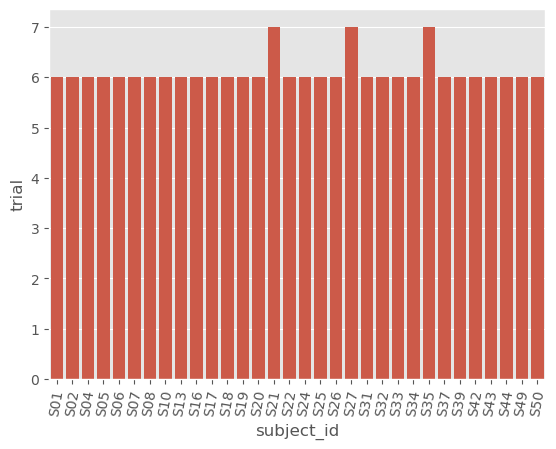

In [62]:
sns.barplot(x = summary.subject_id, y = summary.trial)
_= plt.xticks(rotation=80) #use this trick to avoid the printed output of matplotlib

### Number of individuals in each group

The variable *status* is used to describe the subjects in the control and patients (Parkinson's) groups. They can be controls (0) or patients (1).

Using this information and the auxiliary dataframe `aux`, apply groupby to determine how many individuals are present in each group. Then assess whether the dataset is balanced. Justify your answer and comment on the implications.

In [63]:
#join aux and df
df_aux = pd.merge(aux, df, left_index=True, right_index=True)
df_aux
#count how many different subject_id are in each group
df_aux.groupby("status")["subject_id"].nunique()



/var/folders/l3/nx5xrgc901b995y0b26qg11r0000gn/T/ipykernel_22934/2045090738.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aux.groupby("status")["subject_id"].nunique()


status
0     8
1    24
Name: subject_id, dtype: int64

8 control and 24 with PD

### Scales of variables

Observe the scales of the different variables in the data set. 

In [64]:
aux['status'] = df['status']
df.describe()

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,apq,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Scatter plots

Observe the relationships between the variables associated to Maximal, Average and Minimum Fundamental Frequency. 

<Axes: xlabel='avFF', ylabel='minFF'>

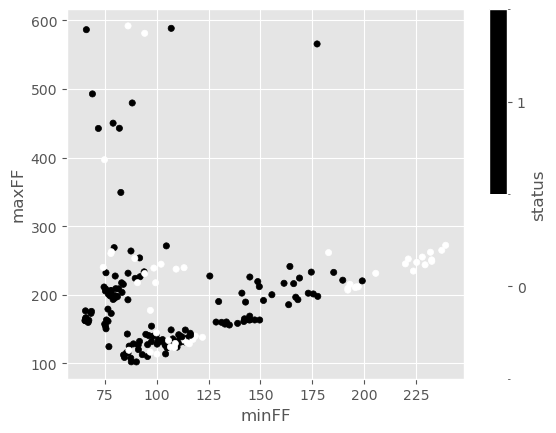

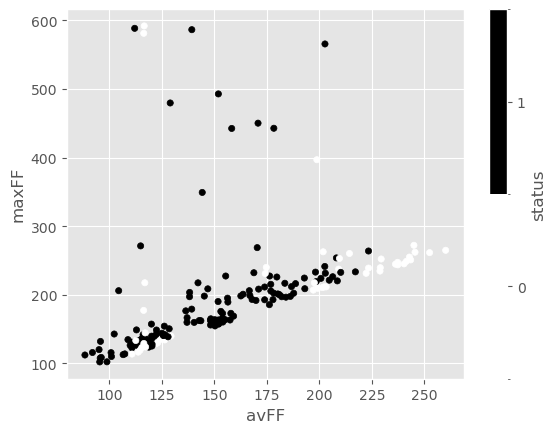

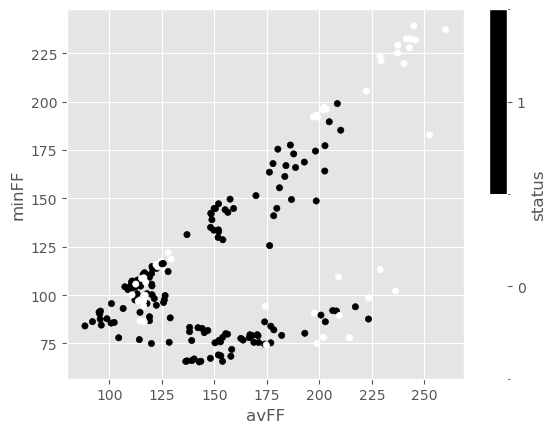

In [65]:
df_aux.plot.scatter(x="minFF", y="maxFF", c="status")
df_aux.plot.scatter(x="avFF", y="maxFF", c="status")
df_aux.plot.scatter(x="avFF", y="minFF", c="status")

* strong correlations
* might overtrain the model, when using variables several time
* be carefull deciding which variable to use for model
* see which variables differentiate groups

### Relationship between the variables `D2` (Correlation Dimension) and `spread1`
by displaying patients and controls in different colors. Use `status` column to differentiate between patiens and controls. 

<Axes: xlabel='D2', ylabel='spread1'>

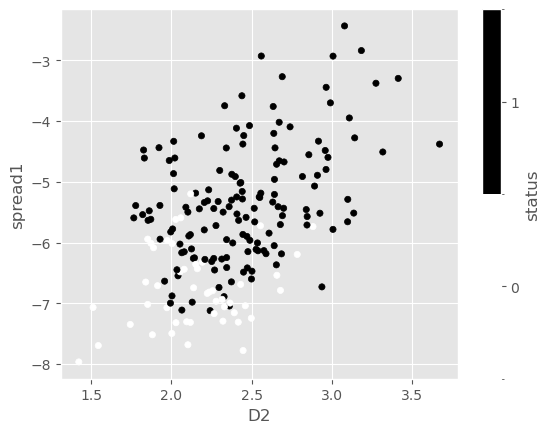

In [66]:
df_aux.plot.scatter(x="D2", y="spread1", c="status")

spread and correlation dimension are higher in PD patients

### New variable `rankFF` 
 displaying the rank of the fundamental frequency calculated as the difference between the maximum and the minimum FF. 

1
0


Text(0, 0.5, 'rankFF')

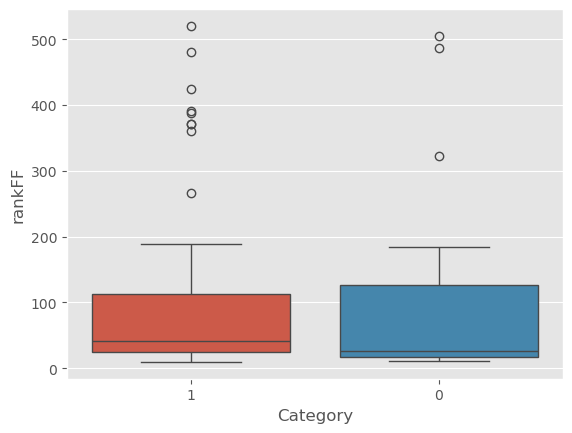

In [67]:
rankFF = df.maxFF - df.minFF
df['rankFF'] = rankFF
df
sns.boxplot(data = df_boxplot(df[['rankFF','status']]))
plt.xlabel('Category')
plt.ylabel('rankFF')         



see if new feature can differentiate groups

### Averaging
As pointed out before, each subject in the data set performed at least 6 diffrent trials. Obtain a new dataframe displaying  all the variables in the dataframe resulting from averaging between different trials per subject. The new dataframe should comprise a total of 31 records (rows), as much as subjects in the data base.
Then, obtain a scatter plot of `spread1` vs. `spread2` displaying different colors for different populations( patiens and controls)

Keep the information of the status of the subject in  (0: control, 1: patient) the resulting data frame

<Axes: xlabel='spread1', ylabel='spread2'>

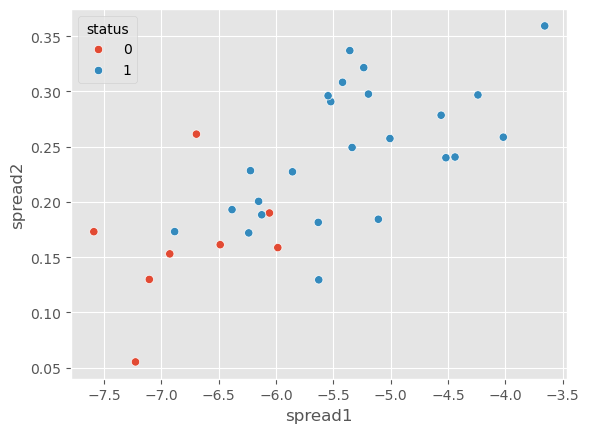

In [68]:
# Calculate mean for numeric columns
df_avg = df_aux.groupby("subject_id", as_index=False).mean(numeric_only=True)
# Add status back (all rows for same subject have same status, so we use first())
status_per_subject = df_aux.groupby("subject_id")["status"].first().reset_index()
df_avg = df_avg.merge(status_per_subject, on="subject_id")
df_avg
sns.scatterplot(data=df_avg, x='spread1', y='spread2', hue='status')    #hue for different colors

### Normailization
Normailization is recomended when dealing with variables in quite different ranges of scales. One of the most used methods is z-core which is calculated as:
$$ z = {x - \mu  \over \sigma} $$
Where $\mu$ and $\sigma$ are the mean and standard deviation of $x$ respectivley 
Create a function `normalize` that returns a new data frame where all numeric variables are normalized with their z-score. Be carefull as to include the not-numerical variables in the resulsing data frame.

*Hint: you can use* `pd._get_numeric_data()` *to extract all numerical variables in the data frame*


In [69]:
def znorm(df):
    # Create a copy to avoid modifying the original dataframe
    df_result = df.copy()
    
    # Select only numeric columns for normalization
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Normalize numeric columns using z-score: (x - mean) / std
    df_numeric_norm = (df_numeric - df_numeric.mean()) / df_numeric.std()       #jede numerische Spalte einzeln, x= elementweise
    
    # Replace the numeric columns in the result dataframe with normalized values, no units
    df_result[df_numeric_norm.columns] = df_numeric_norm
    
    return df_result

df_norm = znorm(df)
df_norm


,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,rankFF
0,phon_R01_S01_1,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,...,-0.067719,-0.192729,1,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655,0.015571
1,phon_R01_S01_2,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,...,-0.137489,-0.632879,1,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974,-0.469254
2,phon_R01_S01_3,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,...,-0.290884,-0.279042,1,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060,-0.625249
3,phon_R01_S01_4,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,...,-0.279998,-0.280624,1,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314,-0.554283
4,phon_R01_S01_5,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,...,-0.177569,-0.505444,1,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262,-0.507091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,0.482226,0.370232,-0.506960,-0.336307,-0.400868,-0.227918,-0.310390,-0.226875,0.591871,...,0.069100,-0.535269,0,-0.481968,-1.087904,-0.783511,-1.253611,0.720090,-0.815604,0.571250
191,phon_R01_S50_3,1.335764,0.611117,-0.616630,-0.119729,-0.400868,0.001210,-0.190781,0.002252,-0.116622,...,-0.166931,-0.618870,0,-0.643260,-0.629882,-0.468652,-1.165475,1.051429,-0.417853,0.845066
192,phon_R01_S50_4,0.494306,0.468897,-0.965907,1.522140,1.035010,0.988481,0.795092,0.989522,-0.351549,...,2.036271,-0.904471,0,-0.875188,-1.127950,-1.011551,-0.815979,0.778335,-0.830273,0.867421
193,phon_R01_S50_5,1.075992,2.184421,-0.951730,0.243297,-0.113692,0.132621,0.164424,0.131417,-0.357912,...,1.172309,-0.647566,0,-0.455203,-1.339874,-0.972457,-0.228478,-0.635368,-0.923727,2.464023


.








     
.  
# Part 2: Predicting Parkinson's Disease with a supervised model

Using the dataset to automatically predict the status of the subject (either diagnosed for Parkinson's or not) using Scikit-learn.

Scikit-learn is a widely used open‑source Python library for machine learning. It provides simple, efficient tools for tasks like classification, regression, clustering, and dimensionality reduction. One of the algorithms it implements is K‑Nearest Neighbors (KNN), a straightforward method that classifies or predicts values based on the closest data points in the data set.

KNN is a non‑parametric, instance‑based algorithm. It predicts the class (or value) of a new data point by looking at the k closest neighbors in the training set. • Distance metric: Usually Euclidean distance, though others (Manhattan, Minkowski) can be used. • Classification: The new point is assigned the majority class among its neighbors. • Regression: The prediction is the average of the neighbors’ values.

It is simple and intuitive, though it can be computationally expensive for large datasets (since it compares against all points). In addition, the choice of k strongly affects performance (too small → noisy, too large → oversmoothing).


## Goals

Using scikit‑learn to build and evaluate predictive models. Gain hands‑on experience with the full workflow: preparing data, fitting models, and interpreting results. In addition, you will practice applying key concepts such as performance metrics (accuracy, precision, recall, specificity, and F‑score) and understand the importance of generalization—ensuring that models perform well not only on the training data but also on unseen test data.

Clustering methods for predicting parkinson.
Apply a *KNN clasifier* implemented in `SKLEARN`

In [70]:
from sklearn.neighbors import KNeighborsClassifier

As K-NN is a supervised method, we can use the labels in `status` for training the classifier. We start by segmenting the data frame into labels (*y*) and observations (*X*)

In [71]:
y = df['status'].astype(int) #as the df comes from a csv, y is treated as str. We convert it to simplify future calculations
X = df.drop(['name','status'], axis=1) # drop all varribales that are not related to the analysis (name and status)
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

Then, the model can be trained using all data. With the obtained model we can later obatin the prediction classes as:

In [72]:

# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the observed data.
knn.fit(X, y)   #X = features, y = status
## See how the model performs.
print ('The accuracy of the model is ' + str(knn.score(X, y)))

The accuracy of the model is 0.8923076923076924


In the previous example, the accuracy was obtained directly from the model using `knn.score`. However, in some cases it is also useful to evaluate additional metrics such as sensitivity, specificity, precision, and other statistics. Combining these measures, for instance, through the F-score, can provide a more comprehensive assessment of model performance, especially when the dataset is unbalanced. 

Given that this is the case (recall Exercise 1 form previous practice), it is a good practice to check these metrics too. We can do that using the module `sklearn.metrics`

In [73]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
y_pred = knn.predict(X)

cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()     #flacht die Confusion Matrix in ein 1D-Array.

print("Confusion Matrix:\n", cm)

# Metrics
precision = precision_score(y, y_pred)
sensitivity = recall_score(y, y_pred)   # also called recall or True Positive Rate
specificity = tn / (tn + fp)
f_score = f1_score(y, y_pred)

print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F-score:", f_score)


Confusion Matrix:
 [[ 32  16]
 [  5 142]]
Precision: 0.8987341772151899
Sensitivity (Recall): 0.9659863945578231
Specificity: 0.6666666666666666
F-score: 0.9311475409836065


The  confusion matrix shows the number of true negatieve (no PD + neg), false positive (no PD + pos) in the first row and false negative (PD + neg) and true positive (PD + pos) in the second row. The True Positive Rate is the sensitivity. The precision is the amount of tp in prportion to the number of all positive - "how often is it correct when it says yes?" . The specificity is the number of subjects without PD and a neg. result (tn) in proportion to the number of all healthy subjects (tn + fp). The F-score describes how good the model predicts with just a little amount of errors (fn or fp). A higher F-score is better.

### Varying the number of neighbors


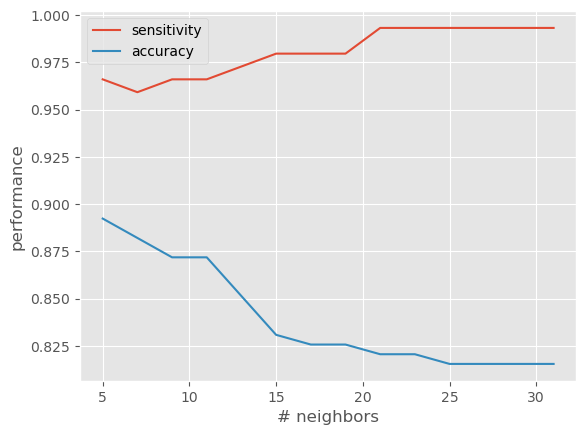

In [74]:

nn = list([5, 7, 9, 11, 15, 17, 19, 21, 23, 25, 27, 29, 31])
sen = list([])
acc =list([])
for i in nn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    y_pred = knn.predict(X)             #y_pred = predicted values
    sen.append(recall_score(y, y_pred))         #recall_score = sensitivity
    acc.append(knn.score(X, y))              #accuracy = correct predictions / total predictions
    
plt.plot(nn,sen) 
plt.plot(nn,acc)   
plt.xlabel('# neighbors')
plt.ylabel('performance')
plt.legend(['sensitivity','accuracy'])
plt.show()

### improve the performance
by fitting a model on normalized data (pick a number of neighbors- *k*- based on your previous results).

In [75]:
Xn = df_norm.drop(['name','status'], axis=1) 

# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the normalized data.
knn.fit(Xn, y)   
## See how the model performs.
y_pred = knn.predict(Xn)
s= recall_score(y, y_pred)
print ('The accuracy of the model is {:.2f} and the sensitivity is {:.2f}'.format(knn.score(Xn, y), s)) #obtain score

The accuracy of the model is 0.95 and the sensitivity is 0.97


The best model works with n = 3. It has the highest accuracy and metrices. 

As a matter of fact, normalization significantly improves the performance of the KNN model in this data. However, this accuracy estimate can be overly optimistic because the model may adapt too closely to the training data. This phenomenon, known as *overfitting*, occurs when a model learns patterns that are specific to the training set—including noise or irrelevant details—rather than generalizable trends. As a result, the model performs well on the data it has seen but fails to make accurate predictions on new, unseen data. 

To mitigate overfitting, it is essential to split the dataset into at least two subsets: a **training set**, used to fit the model, and a **test set**, used to evaluate its performance on data it has never seen. This separation provides a more realistic measure of how the model will behave in practice. 

Therefore, to find an optimal *k*  and a model that generalizes well, it is necessary  to separate the data into training and testing sets. To do so, we will be using the module `sklearn.model_selection` and the function `train_test_split`. We will use the normalized set, given that we already know that the normalized data fits better. 

In [76]:
from sklearn.model_selection import train_test_split

# split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)  

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation/Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (156, 23) (156,)
Validation/Testing set shape: (39, 23) (39,)


### Optimal value of k (=n)
This approach is called *the elbow method*, a visual heuristic used to determine the best number of parameters, as *k* in KNN, or the number of clusters in other models. You plot model performance on the training set against increasing values of k, and the point where improvements begin to diminish —the “elbow” of the curve— is chosen as the best balance between performance and complexity

Use the elbow method to decide the optimal k. Then, obtain and report the accuracy of the model in the test set.

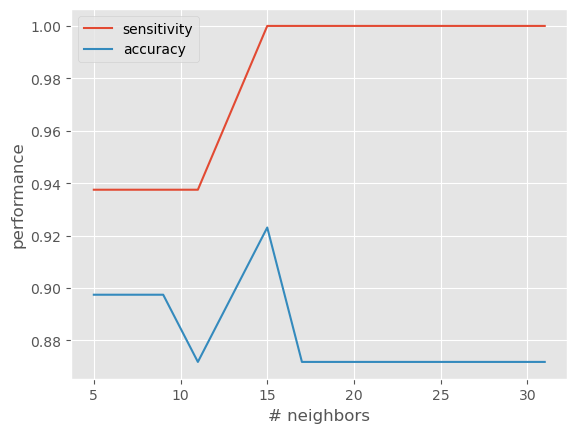

In [77]:
nn = list([5, 7, 9, 11, 15, 17, 19, 21, 23, 25, 27, 29, 31])
sen_train = list([])
acc_train =list([])
for i in nn:
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model on the training data.
    knn.fit(X_train, y_train)   #X = features, y = status
    y_pred = knn.predict(X_test)             #y_pred = predicted values
    sen_train.append(recall_score(y_test, y_pred))         #recall_score = sensitivity
    acc_train.append(knn.score(X_test, y_test))              #accuracy = correct predictions / total predictions
    
plt.plot(nn,sen_train) 
plt.plot(nn,acc_train)   
plt.xlabel('# neighbors')
plt.ylabel('performance')
plt.legend(['sensitivity','accuracy'])
plt.show()

In [78]:
best_k = k_values[np.argmax(sens)] #observe we are taking the decision based on the sensitivity because the dataset is unbalanced!!!
print("Best k:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
# Fit the model on the training data.
knn.fit(X_train, y_train)   #X = features, y = status
y_pred = knn.predict(X_test)             #y_pred = predicted values
sen_test = recall_score(y_test, y_pred)      #recall_score = sensitivity
acc_test = knn.score(X_test, y_test)

print ('The accuracy of the model is {:.2f} and the sensitivity is {:.2f}'.format(acc_test, sen_test)) #obtain score

Best k: 15
The accuracy of the model is 0.92 and the sensitivity is 1.00


The previous model was overtrained because it relied on a small number of neighbors, making it overly sensitive to noise in the training data. This resulted in excellent performance on the training set but poorer generalization to unseen test data.

### Select features


Up to now, we have been using all features, but we already know that some are highly correlated while others do not relate to the condition (control or patient). 

In [79]:
Xn

,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,dbShimer,...,dda,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,rankFF
0,-0.827171,-0.435045,-0.949593,0.334054,0.747835,0.132621,0.758847,0.131417,0.744070,0.737637,...,0.605972,-0.067719,-0.192729,-0.805764,1.756293,0.799266,0.479243,-0.209990,0.866655,0.015571
1,-0.768992,-0.529611,-0.057572,0.713581,1.035010,0.452726,1.273531,0.451521,1.677413,1.763924,...,1.544279,-0.137489,-0.632879,-0.386529,1.832844,1.476053,1.307819,0.274371,1.798974,-0.469254
2,-0.907141,-0.721312,-0.109593,0.882719,1.322186,0.718919,1.581616,0.719960,1.199605,1.024997,...,1.172305,-0.290884,-0.279042,-0.660375,1.937062,1.138515,1.015070,-0.103363,1.399060,-0.625249
3,-0.907286,-0.647425,-0.113935,0.773398,1.322186,0.577399,1.280780,0.576194,1.336955,1.204598,...,1.336788,-0.279998,-0.280624,-0.611559,1.827676,1.437245,1.290518,0.061985,1.802314,-0.554283
4,-0.923281,-0.604689,-0.130272,1.365379,1.896537,1.092937,2.041931,1.093977,1.831733,1.548404,...,1.894585,-0.177569,-0.505444,-0.781010,1.904461,1.776368,0.095948,-0.129692,2.261262,-0.507091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.482226,0.370232,-0.506960,-0.336307,-0.400868,-0.227918,-0.310390,-0.226875,0.591871,0.629877,...,0.757979,0.069100,-0.535269,-0.481968,-1.087904,-0.783511,-1.253611,0.720090,-0.815604,0.571250
191,1.335764,0.611117,-0.616630,-0.119729,-0.400868,0.001210,-0.190781,0.002252,-0.116622,-0.098787,...,0.037013,-0.166931,-0.618870,-0.643260,-0.629882,-0.468652,-1.165475,1.051429,-0.417853,0.845066
192,0.494306,0.468897,-0.965907,1.522140,1.035010,0.988481,0.795092,0.989522,-0.351549,-0.134707,...,-0.293922,2.036271,-0.904471,-0.875188,-1.127950,-1.011551,-0.815979,0.778335,-0.830273,0.867421
193,1.075992,2.184421,-0.951730,0.243297,-0.113692,0.132621,0.164424,0.131417,-0.357912,-0.211678,...,-0.297205,1.172309,-0.647566,-0.455203,-1.339874,-0.972457,-0.228478,-0.635368,-0.923727,2.464023


In [80]:
# Select multiple columns using a list (double square brackets)
X_selected = Xn[['avFF', 'RPDE', 'D2', 'spread1']] 
X_selected.head()

,avFF,RPDE,D2,spread1
0,-0.827171,-0.805764,-0.209990,0.799266
1,-0.768992,-0.386529,0.274371,1.476053
2,-0.907141,-0.660375,-0.103363,1.138515
3,-0.907286,-0.611559,0.061985,1.437245
4,-0.923281,-0.781010,-0.129692,1.776368


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)  

knn = KNeighborsClassifier(n_neighbors=best_k)
# Fit the model on the training data.
knn.fit(X_train, y_train)   #X = features, y = status

acc = knn.score(X_test, y_test)            #accuracy = correct predictions / total predictions

# Metrics
precision = precision_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)   # also called recall or True Positive Rate
specificity = tn / (tn + fp)
f_score = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F-score:", f_score)
print("Accuracy:", acc)

Precision: 0.9142857142857143
Sensitivity (Recall): 1.0
Specificity: 0.6666666666666666
F-score: 0.9552238805970149
Accuracy: 0.8974358974358975


# References
- Little, M., McSharry, P., Hunter, E., Spielman, J., & Ramig, L. (2008). Suitability of dysphonia measurements for telemonitoring of Parkinson’s disease. Nature Precedings, 1-1
- Wu, Y., Chen, P., Yao, Y., Ye, X., Xiao, Y., Liao, L., ... & Chen, J. (2017). Dysphonic voice pattern analysis of patients in Parkinson’s disease using minimum interclass probability risk feature selection and bagging ensemble learning methods. Computational and mathematical methods in medicine, 2017.
